#Introdution
The **n queens problem** is a well-known puzzle that involves placing n queens on an n × n chessboard such that no two queens threaten each other. It is a classic example of a combinatorial optimization problem that has been studied extensively in the field of computer science. Finding a solution for the n queens problem becomes increasingly difficult as the board size (n) increases, and brute-force algorithms become impractical for larger values of n.

**Genetic algorithms** are a class of optimization algorithms that mimic the process of natural selection and evolution. They have been widely used to solve various optimization problems, including the n queens problem. In this report, we present a genetic algorithm approach to solving the n queens problem.

In [ ]:
import numpy as np
from numpy import random
import random as rn
import math
import copy

## Representation
The representation for the n queens problem is an important factor in determining the efficiency and effectiveness of a genetic algorithm. One of the most commonly used representations for the n queens problem is the permutation representation.

In the permutation representation, each individual in the population is represented by a permutation of the integers from 1 to n, where each integer represents the column position of a queen on the board. The position of the queen in the ith row is given by the ith element of the permutation.

For example, consider the 8 queens problem. An individual in the population can be represented by the permutation {4, 2, 7, 5, 1, 8, 3, 6}, which indicates that the queen in the first row is in the 4th column, the queen in the second row is in the 2nd column, and so on.

The permutation representation has several advantages for the n queens problem. First, it is easy to generate random individuals using this representation. Second, it ensures that each queen is placed in a unique row and column, satisfying the constraints of the problem. Finally, it allows for simple and efficient crossover and mutation operators, such as order crossover and swap mutation.

Overall, the permutation representation is a popular and effective choice for solving the n queens problem using genetic algorithms.

In order to solve the n-Queen problem the following steps are needed:

1. Chromosome design
2. Initialization
3. Fitness evaluation
4. Selection
5. Crossover
6. Mutation
7. Update generation
8. Go back to step 3

## Chromosome design
For the n queens problem, the chromosomes in genetic algorithms are usually represented using permutations of integers, where each integer represents the column position of a queen on the board. The permutation represents the order in which the queens are placed on the board, with the position of the queen in the ith row given by the ith element of the permutation.

For example, in the case of the 8 queens problem, a chromosome can be represented by the permutation {4, 2, 7, 5, 1, 8, 3, 6}. This permutation represents the position of the queens in the eight columns of the chessboard.

During the evolutionary process, the genetic algorithm uses selection, crossover, and mutation operators to manipulate the chromosomes in the population. These operations are designed to generate new, potentially better solutions to the n queens problem by changing the order of the queens in the chromosomes.

Overall, the chromosomes in the n queens problem are an essential component of the genetic algorithm and play a crucial role in the search for a solution.

## Fitness Function
The fitness function measures how many queens are attacking each other on the chessboard. A perfect solution to the n queens problem has no queens attacking each other, which means that the fitness value for a perfect solution is the maximum fitness value.

In [ ]:
def fitness(chromosome):
    n = len(chromosome)
    diagonals_main = [0]*(n*2-1)
    diagonals_off = [0]*(n*2-1)
    for i in range(n):
        row = i
        col = chromosome[i]
        diagonals_main[col-row+3]+=1
        diagonals_off[col+row]+=1
    fit =0
    for j in range(n):
        row = j
        col = chromosome[j]
        if diagonals_main[col-row+3]!=0 and diagonals_main[col-row+3]!=1:
            fit+=1
            continue
        if diagonals_off[col+row]!=0 and diagonals_off[col+row]!=1:
            fit+=1
    return fit

A class for the population is an essential component of any genetic algorithm implementation. It represents the population of individuals, which are evolved over time through the application of selection, crossover, and mutation operators.
## Order Recombination
I used order recombination for mutation since we have permutaion in this problem. In the OX crossover operator, two parent chromosomes are selected randomly from the population, and a portion of each parent chromosome is selected to create a new offspring. The portion of the parent chromosomes that is not included in the selected portion is then rearranged in a way that maintains the order of the genes in the offspring. This rearrangement step helps to preserve the important characteristics of the permutation representation.


The OX crossover operator is effective for the n queens problem because it helps to preserve the order of the genes in the permutation representation, which is crucial for ensuring that each queen is placed in a unique row and column on the chessboard. The operator also introduces new genetic material into the population, which helps to increase the diversity of the population and avoid premature convergence to suboptimal solutions.

# Selection

I implemented rank-based selection and mixed it with roulette wheel. Rank-based selection places less emphasis on the absolute fitness values of the individuals in the population. Instead, it focuses on maintaining a diverse population and encouraging exploration of the search space.

Furthermore, rank-based selection can help to prevent the loss of genetic diversity in the population, which can occur with other selection methods. By selecting individuals based on their rank, rather than their fitness value, rank-based selection ensures that individuals with similar fitness values are not always selected, which can lead to the loss of diversity in the population.

Overall, rank-based selection is a suitable and effective selection method for solving the n queens problem using genetic algorithms. It can help to prevent premature convergence, maintain genetic diversity in the population, and encourage exploration of the search space.

# class Population


*   ***fitness_gen:*** generating list of fitnesses for every population
*   ***chromosome_crossover***
*   ***two_point_cross_over***
*   ***cross_over:*** the cycle of cross over, mutation, and replacement are done in this method. 




In [ ]:
class Population:
    def __init__(self, n_sample, pop_init, fit_init):
        self.population = pop_init
        self.fitnesses = fit_init
        self.population = [x for _,x in sorted(zip(self.fitnesses,self.population),reverse=True)]
        self.fitnesses.sort(reverse=True)

    def fitness_gen(self, b):
        punishes = []
        for a in b:
            punishes.append(fitness(a))
        return punishes 
    def chromosome_crossover(self, parent1, parent2, first, second):
        d = len(parent1)
        data = []
        for i in range(d):
            data.append(None)
        data[first:second] = parent1[first:second]
        i = second
        for v in parent2[second:] + parent2[:second]:
            if v not in data:
                if i == first:
                    i = second
                if i == d:
                    i = 0
                data[i] = v
                i += 1
        return data
    def two_point_cross_over(self, parent1, parent2):
        global N
        parent1 = list(parent1)
        parent2 = list(parent2)
      
        (ind1, ind2) = rn.sample(range(N+1), 2)
        first = min(ind1, ind2)
        second = max(ind1, ind2)
        
        child1 = self.chromosome_crossover(parent1, parent2, first, second)
        child2 = self.chromosome_crossover(parent2, parent1, first, second)
    
        return [child1, child2]
    
    def cross_over(self):
        n = len(self.population)
        roulette = sum([[i] * (i + 1) for i in range(n)], [])
        turning = rn.randint(0, n)
        roulette = roulette[turning:] + roulette[:turning]
        pointers = range(0, len(roulette), math.ceil(len(roulette) / n))

        choices = []
        for pointer in pointers:
            choices.append(self.population[roulette[pointer]])

        parents = choices
        rn.shuffle(parents)
        child_population = sum([self.two_point_cross_over(parents[i], parents[i + 1]) for i in range(0, len(parents) - 1, 2)], [])
        
        child_population = mutation(child_population)
        child_fitnesses = self.fitness_gen(child_population)
        child_population = [x for _,x in sorted(zip(child_fitnesses,child_population),reverse=True)]
        child_fitnesses.sort(reverse=True)

        n = len(child_population)
        best_children_count = math.floor(0.7 * n)
        other_children_count = math.floor(0.1 * n)
        other_parents_count = math.floor(0.1 * n)
        best_parents_count = n - best_children_count - other_children_count - other_parents_count
        self.population = (
            child_population[-best_children_count:] +
            rn.sample(child_population[:(n - best_children_count)], other_children_count) +
            rn.sample(self.population[:(n - best_children_count)], other_parents_count) +
            self.population[-best_parents_count:]
        )
        self.fitnesses = self.fitness_gen(self.population)
        self.population = [x for _,x in sorted(zip(self.fitnesses,self.population),reverse=True)]
        self.fitnesses.sort(reverse=True)

        self.population = local_search(self.population)

        self.fitnesses = self.fitness_gen(self.population)
        self.population = [x for _,x in sorted(zip(self.fitnesses,self.population),reverse=True)]
        self.fitnesses.sort(reverse=True)
        #print('children')
        #for i in self.population:
        #    print(i, fitness(i))
        return self.population
    

# Local Search
Combining local search with a genetic algorithm is a popular technique used to improve the efficiency and effectiveness of the genetic algorithm. Local search is a heuristic optimization method that aims to improve a solution by iteratively making small adjustments to the solution.

I used local search to improve the mutation. It made the code more efficient for larger inputs.

In [ ]:
def mutation(children):
    numberOfMutation = rn.randint(0, 1)
    for ch in range(len(children)):
        for i in range(numberOfMutation):
            (q1, q2) = rn.sample(range(N), 2)
            children[ch][q1], children[ch][q2] = children[ch][q2], children[ch][q1]
    return children

def local_search(children):
    numberOfMutation = rn.randint(0, 40)
    for ch in range(len(children)):
        child_cp = children[ch].copy()
        for i in range(numberOfMutation):
            (q1, q2) = rn.sample(range(N), 2)
            children[ch][q1], children[ch][q2] = children[ch][q2], children[ch][q1]
            if fitness(child_cp) < fitness(children[ch]):
                children[ch] = child_cp.copy()
    return children    


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def PlotFunction(n, result):
    board = []
    for i in range(n):
        row = []
        for j in range(n):
            if j == result[i]:
                row.append(10)
            elif j%2 == i%2:
                row.append(3)
            else:
                row.append(6)
        board.append(row)
    print(board)
    plt.figure(figsize=(n, n))
    plt.imshow(board)
    plt.axis(False)
    plt.show

generation:  0 10
generation:  1 10
generation:  2 10
generation:  3 10
generation:  4 10
generation:  5 10
generation:  6 10
generation:  7 10
generation:  8 10
generation:  9 10
generation:  10 10
generation:  11 10
generation:  12 10
generation:  13 10
generation:  14 10
generation:  15 10
generation:  16 10
generation:  17 10
SUCCESS
[4, 1, 3, 5, 7, 2, 0, 6]
[[3, 6, 3, 6, 10, 6, 3, 6], [6, 10, 6, 3, 6, 3, 6, 3], [3, 6, 3, 10, 3, 6, 3, 6], [6, 3, 6, 3, 6, 10, 6, 3], [3, 6, 3, 6, 3, 6, 3, 10], [6, 3, 10, 3, 6, 3, 6, 3], [10, 6, 3, 6, 3, 6, 3, 6], [6, 3, 6, 3, 6, 3, 10, 3]]


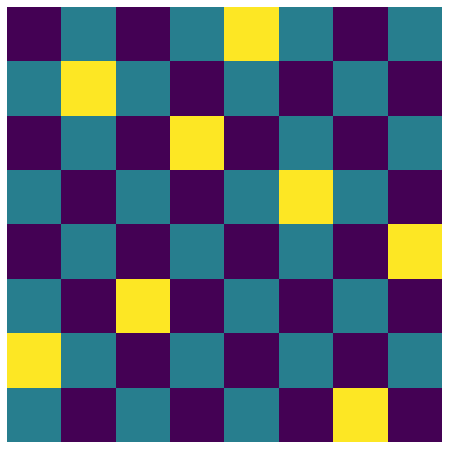

In [ ]:
N = 8

number_of_first_population = 10
pop_init = []
fit_init = []
for i in range(number_of_first_population):
    pop_init.append(list(random.permutation(range(N))))
    fit_init.append(fitness(pop_init[i]))

pop = Population(number_of_first_population, pop_init, fit_init)

no = 0
while True:
    if N>15:
        if no % 10 == 0:
            print('generation: ', no, len(pop.population))
    else:
        print('generation: ', no, len(pop.population))
    next_generation = pop.cross_over()

    fit = [fitness(i) for i in next_generation]
    if min(fit) == 0:
        print('SUCCESS')
        print(next_generation[-1])
        break
    no += 1
PlotFunction(N, next_generation[-1])

generation:  0 10
generation:  10 10
generation:  20 10
generation:  30 10
generation:  40 10
generation:  50 10
generation:  60 10
generation:  70 10
generation:  80 10
generation:  90 10
generation:  100 10
generation:  110 10
generation:  120 10
generation:  130 10
generation:  140 10
generation:  150 10
generation:  160 10
generation:  170 10
generation:  180 10
generation:  190 10
generation:  200 10
generation:  210 10
generation:  220 10
generation:  230 10
generation:  240 10
generation:  250 10
generation:  260 10
generation:  270 10
generation:  280 10
generation:  290 10
generation:  300 10
generation:  310 10
generation:  320 10
generation:  330 10
generation:  340 10
generation:  350 10
generation:  360 10
generation:  370 10
generation:  380 10
generation:  390 10
generation:  400 10
generation:  410 10
generation:  420 10
generation:  430 10
generation:  440 10
generation:  450 10
generation:  460 10
generation:  470 10
generation:  480 10
generation:  490 10
generation:

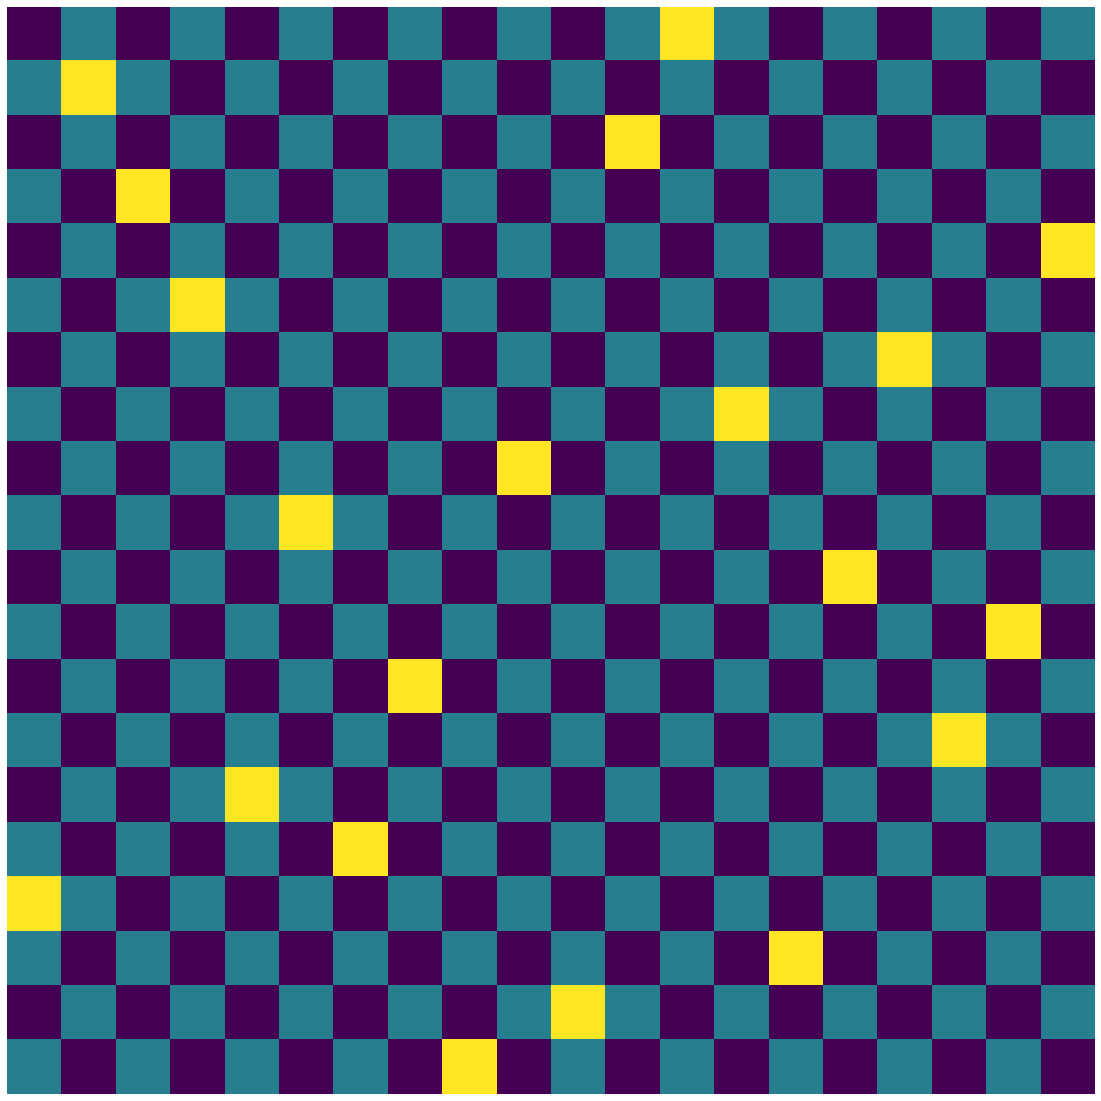

In [ ]:
N = 20

number_of_first_population = 10
pop_init = []
fit_init = []
for i in range(number_of_first_population):
    pop_init.append(list(random.permutation(range(N))))
    fit_init.append(fitness(pop_init[i]))

pop = Population(number_of_first_population, pop_init, fit_init)

no = 0
while True:
    if N>15:
        if no % 10 == 0:
            print('generation: ', no, len(pop.population))
    else:
        print('generation: ', no, len(pop.population))
    next_generation = pop.cross_over()

    fit = [fitness(i) for i in next_generation]
    if min(fit) == 0:
        print('SUCCESS')
        print(next_generation[-1])
        break
    no += 1
PlotFunction(N, next_generation[-1])

generation:  0 10
generation:  50 10
generation:  100 10
generation:  150 10
generation:  200 10
generation:  250 10
generation:  300 10
generation:  350 10
generation:  400 10
generation:  450 10
generation:  500 10
generation:  550 10
generation:  600 10
generation:  650 10
generation:  700 10
generation:  750 10
generation:  800 10
generation:  850 10
generation:  900 10
generation:  950 10
generation:  1000 10
generation:  1050 10
generation:  1100 10
generation:  1150 10
generation:  1200 10
generation:  1250 10
generation:  1300 10
generation:  1350 10
generation:  1400 10
generation:  1450 10
generation:  1500 10
generation:  1550 10
generation:  1600 10
generation:  1650 10
generation:  1700 10
generation:  1750 10
generation:  1800 10
generation:  1850 10
generation:  1900 10
generation:  1950 10
generation:  2000 10
generation:  2050 10
generation:  2100 10
generation:  2150 10
generation:  2200 10
generation:  2250 10
generation:  2300 10
generation:  2350 10
generation:  24

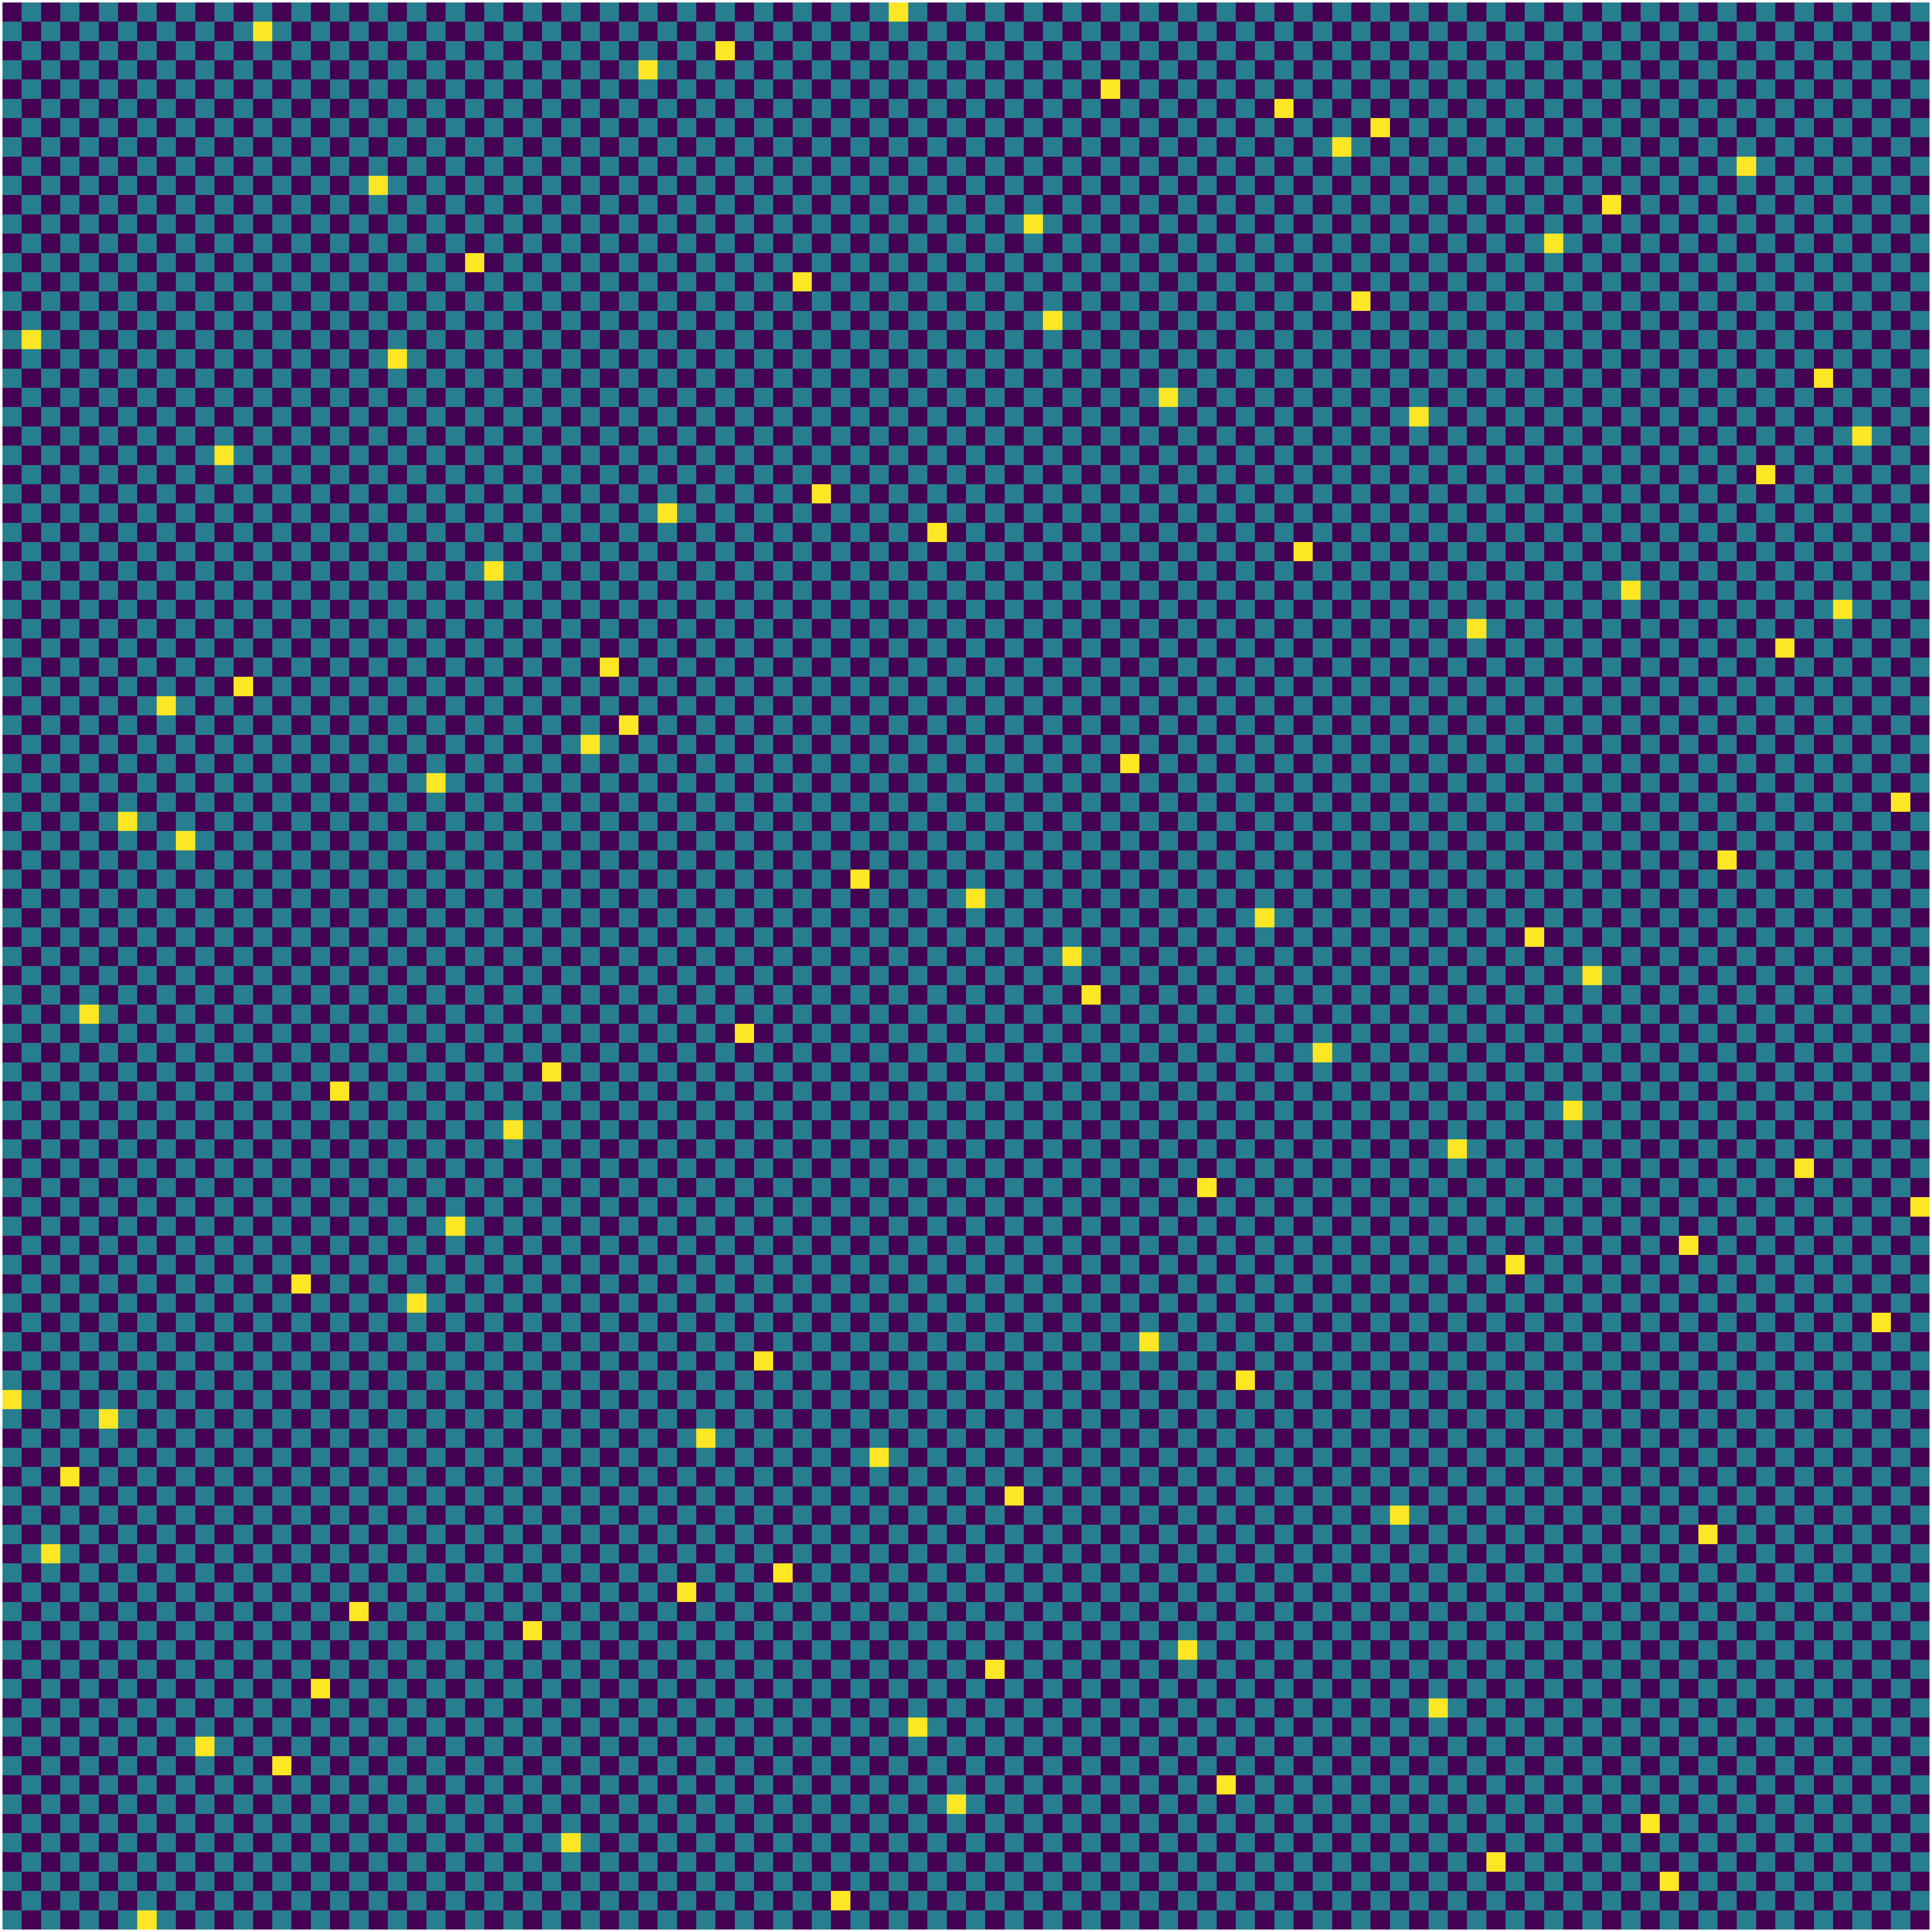

In [ ]:
N = 100

number_of_first_population = 10
pop_init = []
fit_init = []
for i in range(number_of_first_population):
    pop_init.append(list(random.permutation(range(N))))
    fit_init.append(fitness(pop_init[i]))

pop = Population(number_of_first_population, pop_init, fit_init)

no = 0
while True:
    if N>15:
        if no % 50 == 0:
            print('generation: ', no, len(pop.population))
    else:
        print('generation: ', no, len(pop.population))
    next_generation = pop.cross_over()

    fit = [fitness(i) for i in next_generation]
    if min(fit) == 0:
        print('SUCCESS')
        print(next_generation[-1])
        break
    no += 1
PlotFunction(N, next_generation[-1])